# GRIP Task 2:

**Problem statement:From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.**

**Jasmine Boro**

In [11]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
iris=pd.read_csv(r"C:\Users\Jasmine\Downloads\Iris.csv")#reading the dataset

iris.head()#displaying the data, since we're using head function, only 5 records are displayed by default

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**How to find the optimum number of clusters in K means?
->The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.**

In [13]:
x=iris.iloc[:,[0,1,2,3,4]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

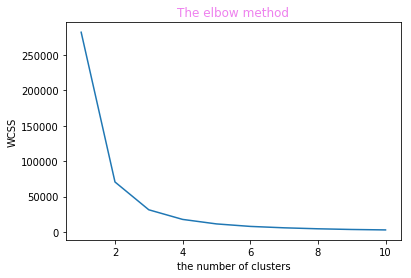

In [14]:
#now we plot a graph to observe the elbow in the line graph to know our number of clusters
plt.plot(range(1,11),wcss)
plt.title("The elbow method", color="violet")
plt.xlabel("the number of clusters")
plt.ylabel("WCSS")
plt.show()

**We can clearly see the elbow forming at '3', this is where the optimum cluster is found.**

In [17]:
#Now we apply the Kmeans tp our data set


kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

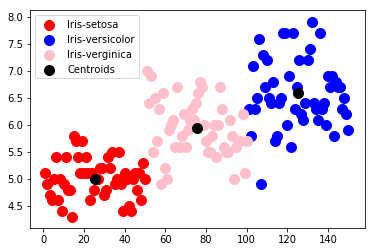

In [24]:
#now we try to visualize the first two columns

plt.scatter(x[y_kmeans==0 ,0], x[y_kmeans==0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0 ],x[y_kmeans==1,1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='pink',label='Iris-verginica')

#now we plot the centroids to the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='black',label='Centroids')
plt.legend()

**In Conclusion, we find 3 clusters by using the Elbow method, and after finding the number of clusters we use kmeans to group our data into 3 clusters and visualize it.**